In [177]:
import pandas as pd

df = pd.read_csv("a1_data.csv")
df.head()

,A,B,C,D,E,F,G,H,I,J,K
0,3.179665,3.030625,3.222752,2.836624,3.386284,1.910165,2.179628,3.464657,3.705143,3.921797,3.566766
1,3.313155,3.127535,3.367189,2.799483,2.527001,2.359419,2.461049,3.394200,3.002324,3.487035,3.753581
2,3.531847,3.554489,3.441636,2.582776,2.730851,2.263097,2.461049,3.452962,3.531599,3.773342,3.254741
3,3.621384,3.828081,3.640896,2.704508,1.727649,1.855651,2.021082,3.570291,3.611415,3.725917,3.328318
4,3.285691,3.206716,2.992451,2.562289,3.011359,2.414187,2.612864,3.331957,3.143080,3.679484,3.874796


In [178]:
import numpy as np

X = df.values

In [179]:
import numpy as np
from sklearn.linear_model import LinearRegression, LassoLarsIC

def sortnregress(X):
    LR = LinearRegression()
    LL = LassoLarsIC(criterion='bic')

    d = X.shape[1]
    W = np.zeros((d, d))
    increasing = np.argsort(np.var(X, axis=0))
    print(increasing)
    for k in range(1, d):
        covariates = increasing[:k]
        target = increasing[k]
        LR.fit(X[:, covariates], X[:, target].ravel())
        weight = np.abs(LR.coef_)
        LL.fit(X[:, covariates] * weight, X[:, target].ravel())
        W[covariates, target] = LL.coef_ * weight
    return W


In [191]:
W1 = sortnregress(X)
print(np.round(W1, 3))

[ 1  0  7  2  8 10  6  4  5  3  9]
[[0.    0.    0.    0.    0.    0.    0.    0.014 0.    0.195 0.   ]
 [0.704 0.    0.    0.    0.    0.    0.005 0.    0.    0.227 0.   ]
 [0.    0.    0.    0.078 0.104 0.    0.016 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.004 0.   ]
 [0.    0.    0.    0.215 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.193 0.   ]
 [0.    0.    0.    0.    0.    0.96  0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.089 0.022 0.216 0.    0.103 0.218 0.005]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.701 0.159]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.009 0.    0.011 0.    0.    0.    0.   ]]


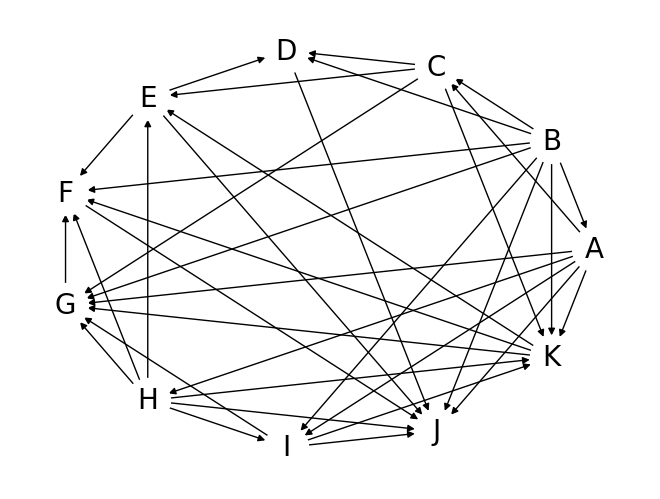

In [181]:
# visualize the matrix as a directed graph
import networkx as nx
import matplotlib.pyplot as plt

def graph(W):
    G = nx.DiGraph(W)
    G = nx.relabel_nodes(G, {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K'})
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='w', node_size=1000, font_size=20)
    plt.show()

graph(W1)

In [182]:
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression

def sortnregress(X):
    lasso = Lasso(alpha=0.01)

    d = X.shape[1]
    W = np.zeros((d, d))
    increasing = np.argsort(np.var(X, axis=0))
    print(increasing)
    for k in range(1, d):
        covariates = increasing[:k]
        target = increasing[k]
        lasso.fit(X[:, covariates], X[:, target].ravel())
        weight = np.abs(lasso.coef_)
        W[covariates, target] = weight
    return W

In [183]:
W2 = sortnregress(X)

[ 1  0  7  2  8 10  6  4  5  3  9]


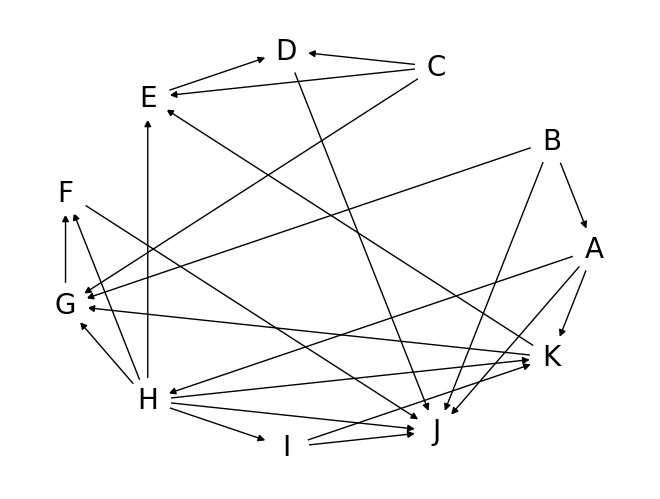

In [184]:
graph(W2)

In [194]:
df_pred = pd.DataFrame()
df_res = pd.DataFrame()
for col in df.columns:
    weights = W1[:, df.columns.get_loc(col)]
    # weights = W1[df.columns.get_loc(col), :]
    print(col, np.round(weights, 3))
    # predict from other columns and weights
    df_pred[col] = weights @ df.values.T
    # calculate the residual
    df_res[col] = df[col] - df_pred[col]


A [0.    0.704 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
B [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
C [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
D [0.    0.    0.078 0.    0.215 0.    0.    0.    0.    0.    0.   ]
E [0.    0.    0.104 0.    0.    0.    0.    0.089 0.    0.    0.009]
F [0.    0.    0.    0.    0.    0.    0.96  0.022 0.    0.    0.   ]
G [0.    0.005 0.016 0.    0.    0.    0.    0.216 0.    0.    0.011]
H [0.014 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
I [0.    0.    0.    0.    0.    0.    0.    0.103 0.    0.    0.   ]
J [0.195 0.227 0.    0.004 0.    0.193 0.    0.218 0.701 0.    0.   ]
K [0.    0.    0.    0.    0.    0.    0.    0.005 0.159 0.    0.   ]


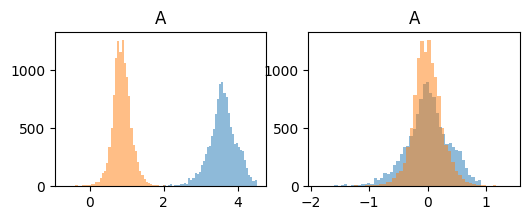

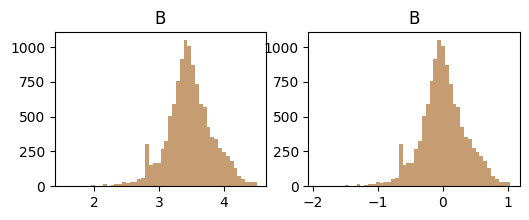

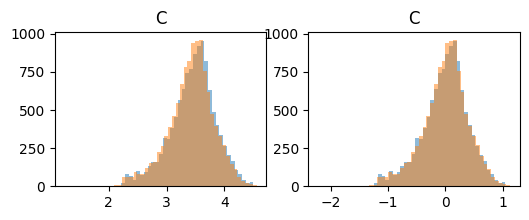

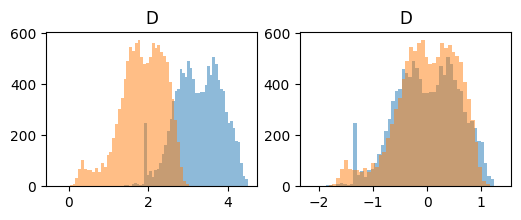

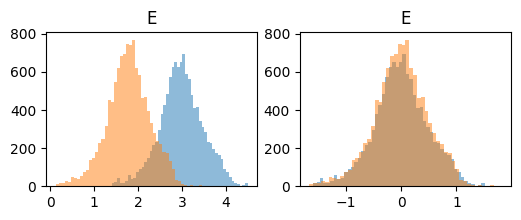

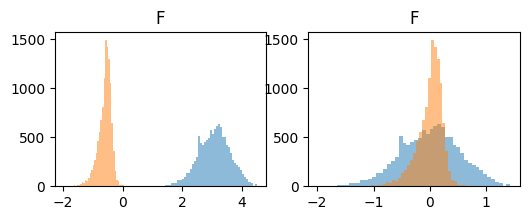

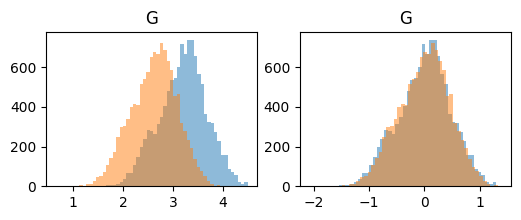

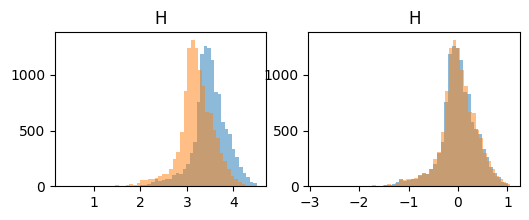

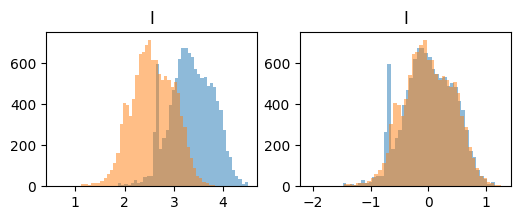

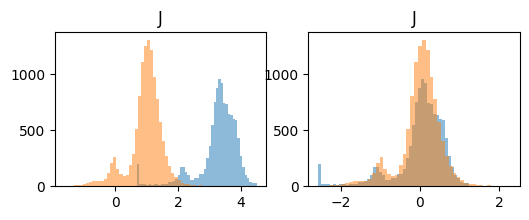

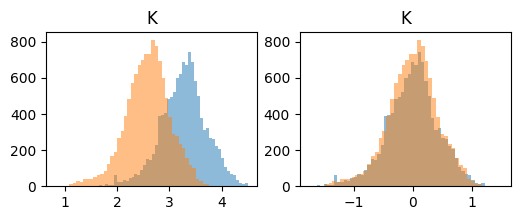

In [186]:
# plot hists for both df and df_res, as overlayed histograms
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(6, 2))
    axes[0].set_title(col)
    axes[0].hist(df[col], alpha=0.5, label='df', bins=50)
    axes[0].hist(df_res[col], alpha=0.5, label='df_res', bins=50)
    axes[1].set_title(col)
    axes[1].hist(df[col] - df[col].mean(), alpha=0.5, label='df', bins=50)
    axes[1].hist(df_res[col] - df_res[col].mean(), alpha=0.5, label='df_res', bins=50)
    plt.show()

In [187]:
# calculate mse for every column of df_res
for col in df.columns:
    mse = np.mean(df_res[col]**2)
    print(col, mse)

A 0.8195943000762045
B 12.122050245403734
C 11.868321568087266
D 3.733083523684471
E 3.4054798096951946
F 0.4071426328341688
G 7.078951468480524
H 10.355679274819837
I 6.810046209388462
J 1.2168443365251342
K 6.845818055874323


In [188]:
def mse(X, W):
    X_pred = W.T @ X.T
    X_res = X.T - X_pred
    return np.mean(X_res**2, axis=1)

mse(X, W1)

array([ 0.8195943 , 12.12205025, 11.86832157,  3.73308352,  3.40547981,
        0.40714263,  7.07895147, 10.35567927,  6.81004621,  1.21684434,
        6.84581806])

In [189]:
mse(X, W2)

array([ 1.37715083, 12.12205025, 12.07966147,  5.82809817,  5.44903034,
        0.05719062,  5.68559541, 11.94591574,  9.14432396,  4.13701139,
        7.618168  ])

Linear regression even on _all_ other nodes does not give good fits:

A [ 0.86   0.113  0.01   0.034 -0.025  0.016  0.075  0.069 -0.088 -0.031]


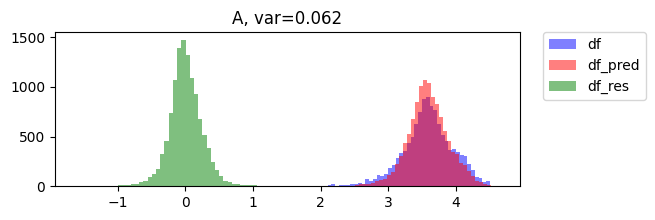

B [ 0.748 -0.02   0.03  -0.012 -0.006  0.067  0.019 -0.015  0.101  0.076]


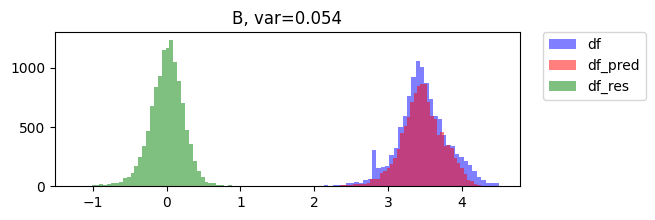

C [ 0.325 -0.065  0.138  0.163 -0.167  0.229  0.159  0.119  0.019  0.103]


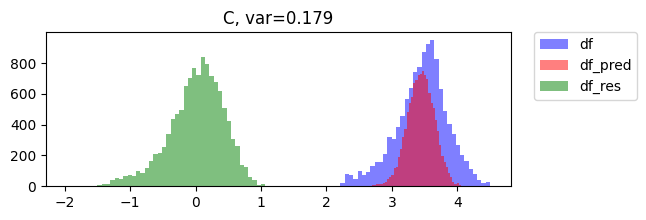

D [ 0.05   0.177  0.248  0.294 -0.085  0.146  0.045  0.048 -0.026  0.089]


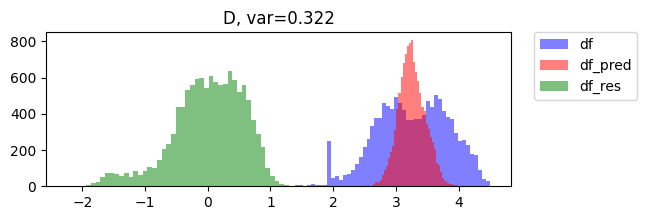

E [ 0.124 -0.051  0.205  0.205  0.087 -0.068  0.204  0.028  0.046  0.1  ]


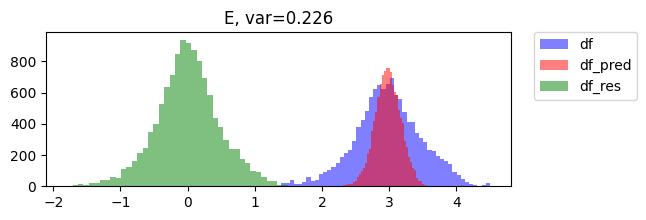

F [-0.021 -0.006 -0.048 -0.014  0.02   0.965  0.057 -0.031  0.033  0.01 ]


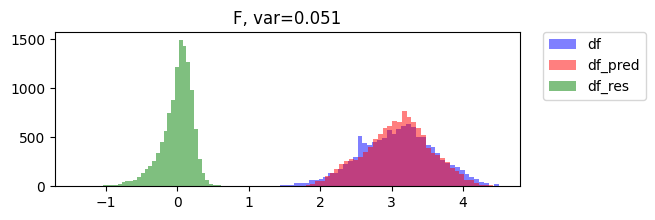

G [ 0.011  0.055  0.056  0.02  -0.013  0.828  0.047  0.004  0.011 -0.005]


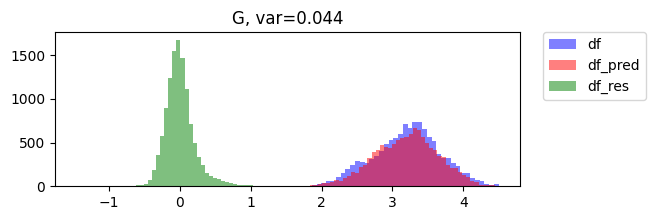

H [ 0.162  0.048  0.119  0.019  0.121  0.148  0.145  0.273 -0.125  0.145]


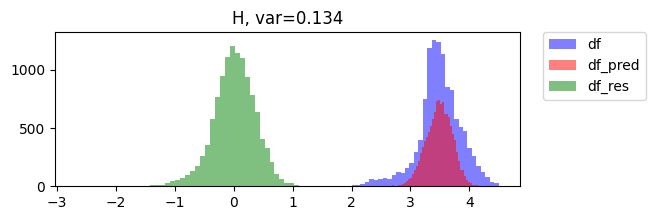

I [ 0.148 -0.038  0.089  0.02   0.017 -0.08   0.013  0.273  0.36   0.185]


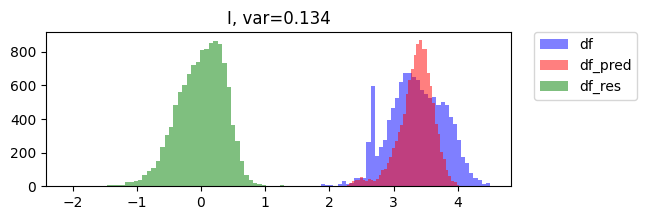

J [-0.41   0.537  0.031 -0.023  0.06   0.186  0.075 -0.27   0.778  0.055]


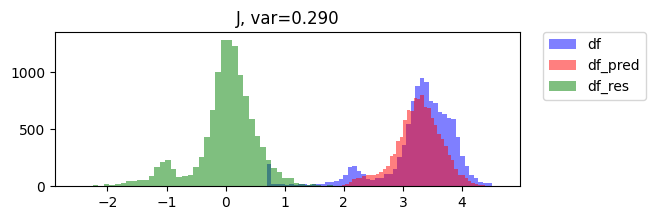

K [-0.1    0.278  0.114  0.055  0.088  0.039 -0.023  0.213  0.273  0.037]


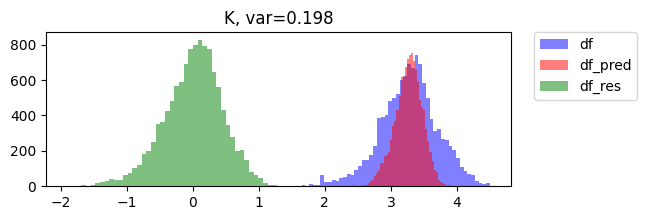

In [293]:
df_pred = pd.DataFrame()
df_res = pd.DataFrame()
for col in df.columns:
    # regress on all other columns
    LR = LinearRegression(fit_intercept=False)
    LR.fit(df.drop(col, axis=1), df[col])
    # print the weights
    print(col, np.round(LR.coef_, 3))
    # predict from other columns and weights
    df_pred[col] = LR.predict(df.drop(col, axis=1))
    # calculate the residual
    df_res[col] = df[col] - df_pred[col]
    # calculate the variance of the residual
    var = np.var(df_res[col])
    # plot hists for both df, df_pred, and df_res, as overlayed histograms
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    ax.set_title(f'{col}, var={var:.3f}')
    ax.hist(df[col], alpha=0.5, label='df', bins=50, color='blue')
    ax.hist(df_pred[col], alpha=0.5, label='df_pred', bins=50, color='red')
    ax.hist(df_res[col], alpha=0.5, label='df_res', bins=50, color='green')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

If we fit the regression on the residuals from the previous step, it looks better:

A [-0.741 -0.719 -0.372 -0.502 -2.363 -2.911 -0.945 -0.969 -0.502 -0.708]


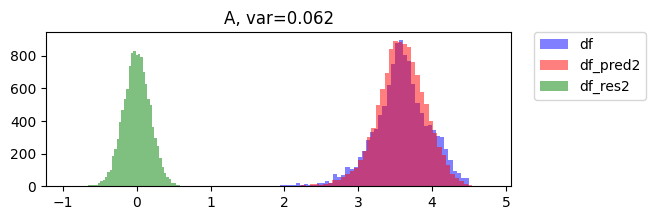

B [-0.501 -0.723 -0.338 -0.482 -1.853 -2.343 -0.887 -0.822 -0.308 -0.577]


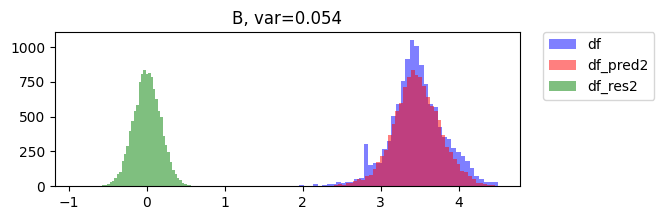

C [-2.453 -2.977 -0.371 -0.481 -2.974 -3.554 -1.157 -1.115 -0.551 -0.783]


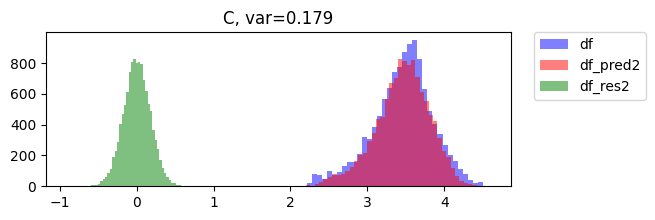

D [-5.701 -6.358 -1.815 -1.067 -6.181 -7.499 -2.634 -2.565 -1.196 -1.677]


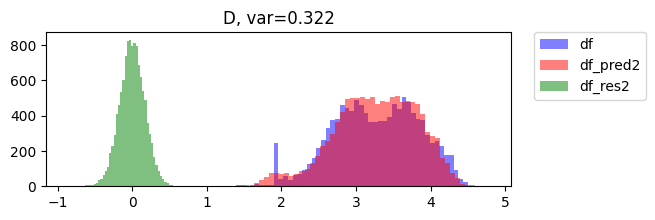

E [-4.557 -5.189 -1.415 -0.62  -4.685 -5.888 -1.929 -1.947 -0.886 -1.279]


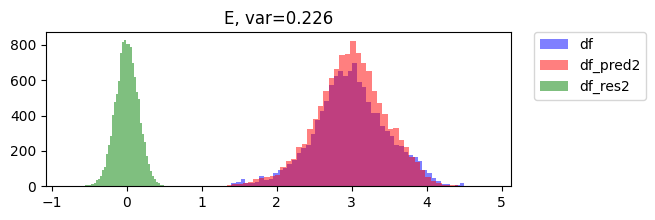

F [-5.257 -5.574 -1.85  -0.94  -1.179 -1.479 -1.994 -2.255 -0.826 -1.52 ]


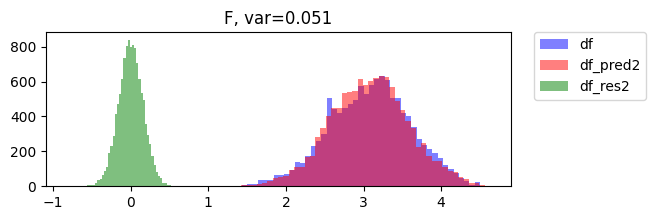

G [-4.087 -4.308 -1.436 -0.73  -0.941  0.203 -1.537 -1.778 -0.64  -1.22 ]


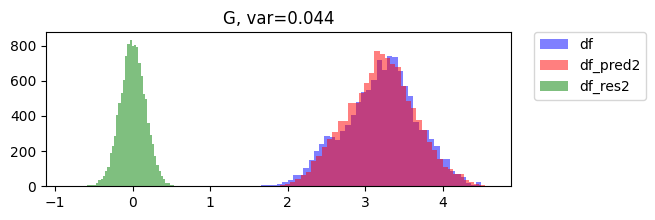

H [-2.195 -2.534 -0.79  -0.413 -0.447 -1.467 -2.087 -0.853 -0.519 -0.615]


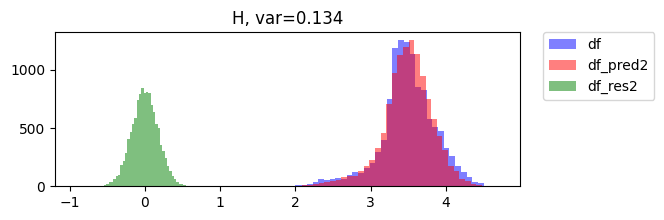

I [-3.164 -3.386 -1.072 -0.574 -0.698 -3.255 -4.092 -1.271 -0.151 -0.727]


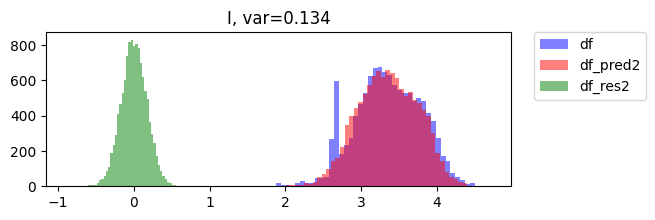

J [-7.853 -7.932 -2.624 -1.382 -1.722 -6.759 -8.574 -3.55  -2.27  -2.016]


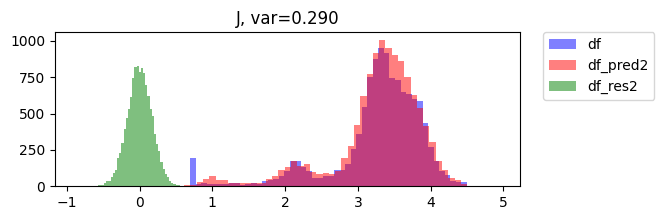

K [-3.483 -3.633 -1.158 -0.579 -0.714 -3.469 -4.412 -1.399 -1.152 -0.532]


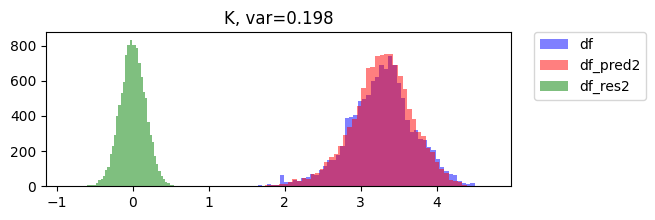

In [294]:
df_pred2 = pd.DataFrame()
df_res2 = pd.DataFrame()
for col in df.columns:
    # regress on all other columns
    LR = LinearRegression()
    LR.fit(df_res.drop(col, axis=1), df[col])
    # print the weights
    print(col, np.round(LR.coef_, 3))
    # predict from other columns and weights
    df_pred2[col] = LR.predict(df_res.drop(col, axis=1))
    # calculate the residual
    df_res2[col] = df[col] - df_pred2[col]
    # calculate the variance of the residual
    var = np.var(df_res[col])
    # plot hists for both df, df_pred, and df_res, as overlayed histograms
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    ax.set_title(f'{col}, var={var:.3f}')
    ax.hist(df[col], alpha=0.5, label='df', bins=50, color='blue')
    ax.hist(df_pred2[col], alpha=0.5, label='df_pred2', bins=50, color='red')
    ax.hist(df_res2[col], alpha=0.5, label='df_res2', bins=50, color='green')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

Repeating this and fitting again on the residuals from the last step does not work:

A [ 0.807  0.066 -0.004  0.021  0.002 -0.036  0.04   0.048 -0.093 -0.062]


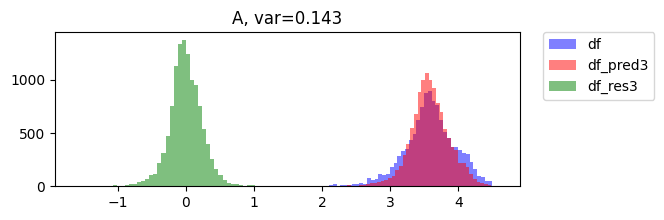

B [ 0.703 -0.059  0.017 -0.023  0.018  0.02  -0.011 -0.032  0.091  0.046]


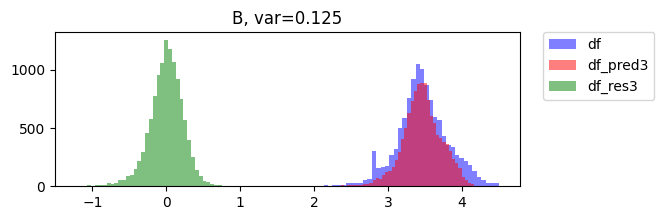

C [ 0.163 -0.165  0.065  0.089 -0.038 -0.004  0.006  0.028 -0.011 -0.035]


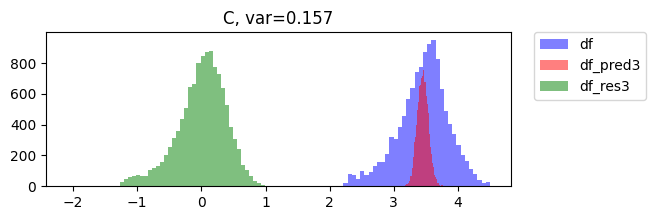

D [-0.019  0.103  0.137  0.256 -0.02   0.021 -0.034  0.003 -0.042  0.011]


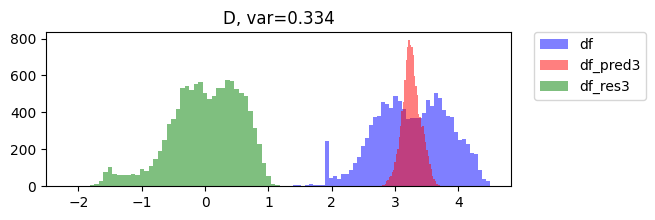

E [ 0.077 -0.096  0.132  0.181  0.127 -0.147  0.148 -0.002  0.034  0.048]


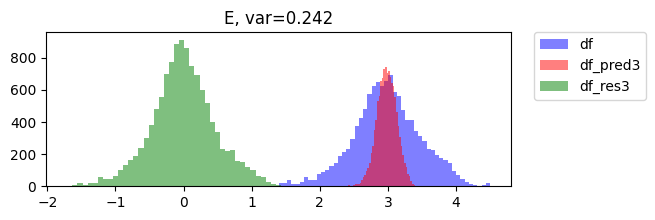

F [ 0.002  0.017 -0.013 -0.003  0.029  0.985  0.081 -0.016  0.038  0.035]


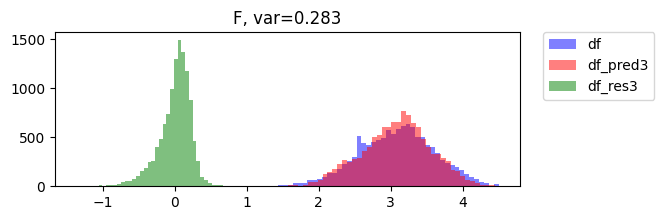

G [-0.024  0.015 -0.001  0.003 -0.027  0.809  0.004 -0.019  0.002 -0.044]


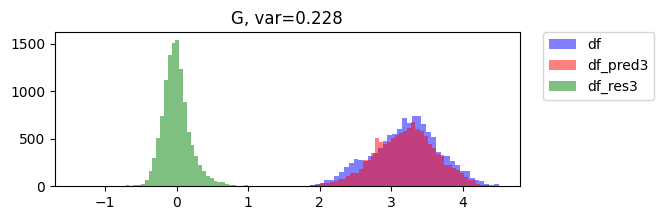

H [ 0.082 -0.026  0.005 -0.014  0.083  0.2    0.011  0.208 -0.132  0.057]


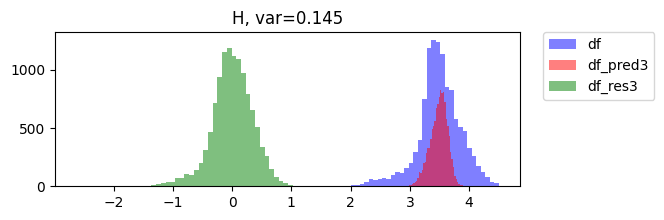

I [ 0.105 -0.078  0.025  0.001 -0.001 -0.041 -0.06   0.219  0.341  0.135]


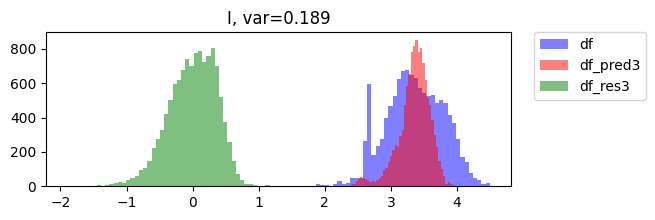

J [-0.44   0.497 -0.022 -0.039  0.044  0.216  0.013 -0.307  0.749  0.016]


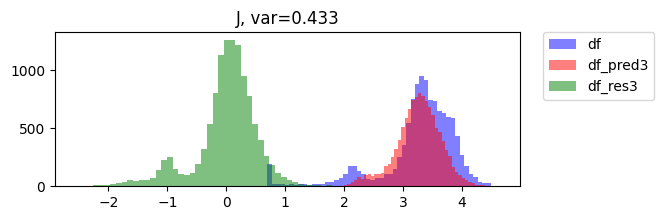

K [-0.182  0.153 -0.042  0.006  0.039  0.123 -0.189  0.082  0.183  0.01 ]


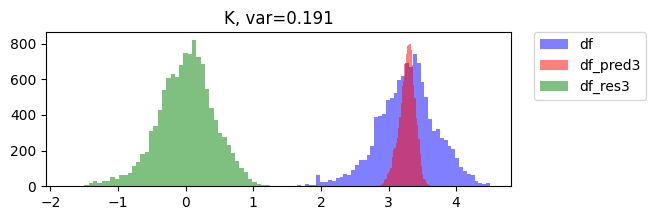

In [292]:
df_pred3 = pd.DataFrame()
df_res3 = pd.DataFrame()
for col in df.columns:
    # regress on all other columns
    LR = LinearRegression()
    LR.fit(df_res2.drop(col, axis=1), df[col])
    # print the weights
    print(col, np.round(LR.coef_, 3))
    # predict from other columns and weights
    df_pred3[col] = LR.predict(df_res2.drop(col, axis=1))
    # calculate the residual
    df_res3[col] = df[col] - df_pred3[col]
    # calculate the variance of the residual
    var = np.var(df_res2[col])
    # plot hists for both df, df_pred, and df_res, as overlayed histograms
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    ax.set_title(f'{col}, var={var:.3f}')
    ax.hist(df[col], alpha=0.5, label='df', bins=50, color='blue')
    ax.hist(df_pred3[col], alpha=0.5, label='df_pred3', bins=50, color='red')
    ax.hist(df_res3[col], alpha=0.5, label='df_res3', bins=50, color='green')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

Hypothesis: If this is an additive model, then some intermediate nodes are not present in the data.